## Brain Tumor Modeling

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Input
from tensorflow.keras.models import Model

def build_autoencoder(input_shape=(128, 128, 3)):
    inputs = Input(shape=input_shape)

    # Encoder
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)

    outputs = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = Model(inputs, outputs)
    return autoencoder

# 모델 빌드 및 컴파일
autoencoder = build_autoencoder()
autoencoder.compile(optimizer='adam', loss='mse')  # 재구성 오차를 최소화하기 위해 MSE 사용


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Input
from tensorflow.keras.models import Model
import numpy as np

# 데이터 전처리 및 증강을 위한 ImageDataGenerator 설정
datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# 정상 이미지 훈련 데이터 생성기 (notumor 폴더만 사용)
train_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/DEEP LEARNING',
    target_size=(128, 128),
    batch_size=32,
    class_mode=None,           # Autoencoder는 레이블이 필요 없으므로 None
    classes=['notumor']         # 'notumor' 폴더만 사용
)

# train_generator의 모든 이미지 데이터를 배열로 수집
train_images = []
for i in range(len(train_generator)):
    batch = train_generator[i]
    train_images.append(batch)

train_images = np.vstack(train_images)  # 리스트를 numpy 배열로 변환

# Autoencoder 모델 구축
def build_autoencoder(input_shape=(128, 128, 3)):
    inputs = Input(shape=input_shape)

    # Encoder
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)

    outputs = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = Model(inputs, outputs)
    return autoencoder

# 모델 빌드 및 컴파일
autoencoder = build_autoencoder()
autoencoder.compile(optimizer='adam', loss='mse')  # 재구성 오차를 최소화하기 위해 MSE 사용

# Autoencoder 학습
autoencoder.fit(
    train_images, train_images,  # 입력과 출력을 동일하게 설정
    batch_size=32,
    epochs=10,                   # 원하는 epoch 수로 설정
    validation_split=0.2         # 학습 데이터 중 20%를 검증에 사용
)


Found 405 images belonging to 1 classes.
Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 359ms/step - loss: 0.1294 - val_loss: 0.1095
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0869 - val_loss: 0.0372
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0331 - val_loss: 0.0263
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0225 - val_loss: 0.0172
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0166 - val_loss: 0.0162
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0143 - val_loss: 0.0154
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0141 - val_loss: 0.0135
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0122 - val_loss: 0.0129
Epoch 9/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0125 - val_loss: 0.0119
Epoch 10/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0115 - val_loss: 0.0110


Testing Normal Images:
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step
Folder: notumor, Image Path: /content/drive/MyDrive/DEEP LEARNING/notumor/Te-no_0021.jpg
Reconstruction Loss: [0.00545603]


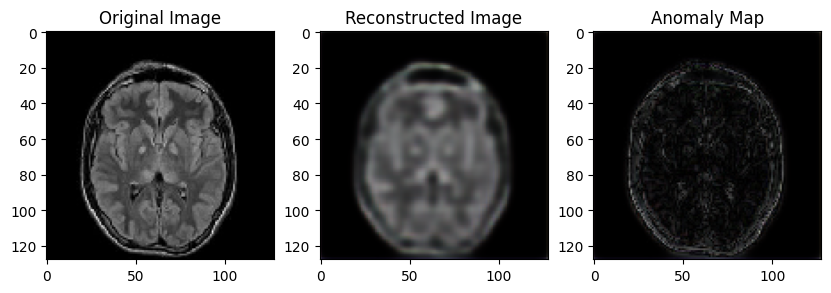

No anomaly detected.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Folder: notumor, Image Path: /content/drive/MyDrive/DEEP LEARNING/notumor/Te-no_0017.jpg
Reconstruction Loss: [0.00351805]


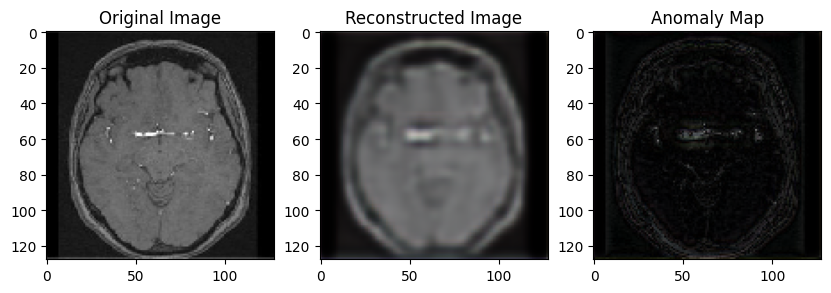

No anomaly detected.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Folder: notumor, Image Path: /content/drive/MyDrive/DEEP LEARNING/notumor/Te-no_0010.jpg
Reconstruction Loss: [0.00941871]


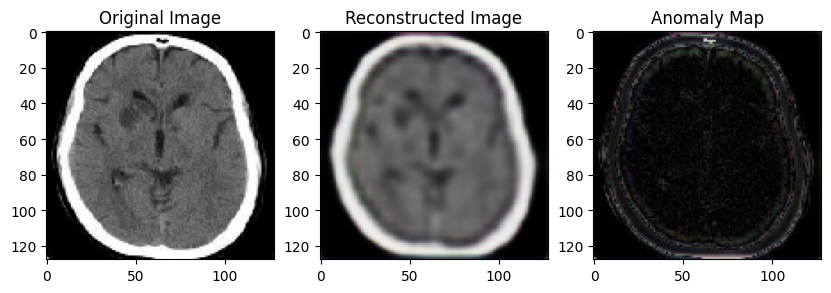

No anomaly detected.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Folder: notumor, Image Path: /content/drive/MyDrive/DEEP LEARNING/notumor/Te-noTr_0006.jpg
Reconstruction Loss: [0.00378899]


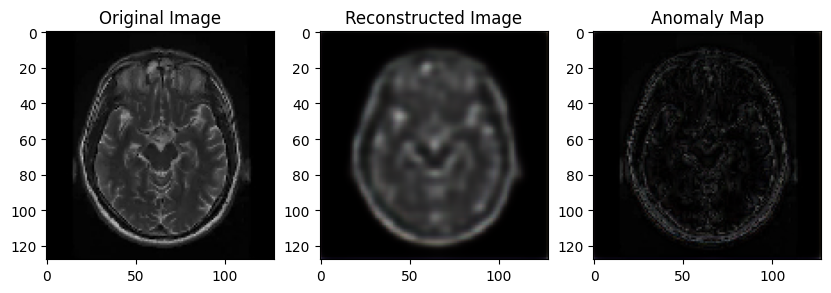

No anomaly detected.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Folder: notumor, Image Path: /content/drive/MyDrive/DEEP LEARNING/notumor/Te-noTr_0001.jpg
Reconstruction Loss: [0.00512209]


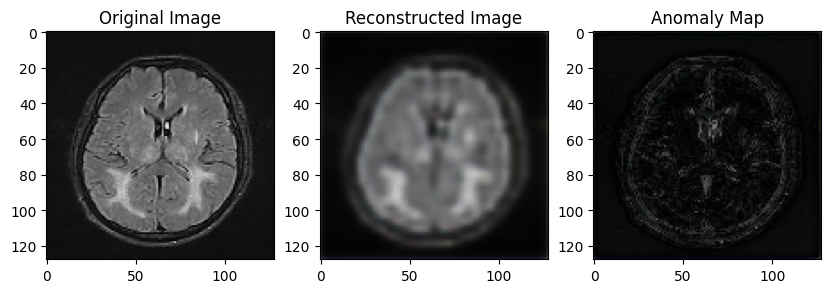

No anomaly detected.

Testing Glioma Images:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Folder: glioma, Image Path: /content/drive/MyDrive/DEEP LEARNING/glioma/Te-glTr_0004.jpg
Reconstruction Loss: [0.00227428]


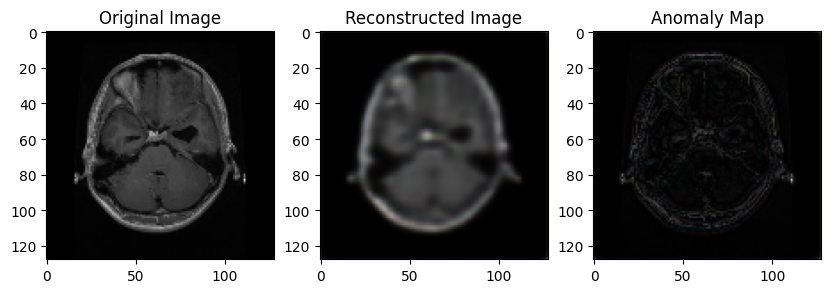

No anomaly detected.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Folder: glioma, Image Path: /content/drive/MyDrive/DEEP LEARNING/glioma/Te-glTr_0008.jpg
Reconstruction Loss: [0.0029883]


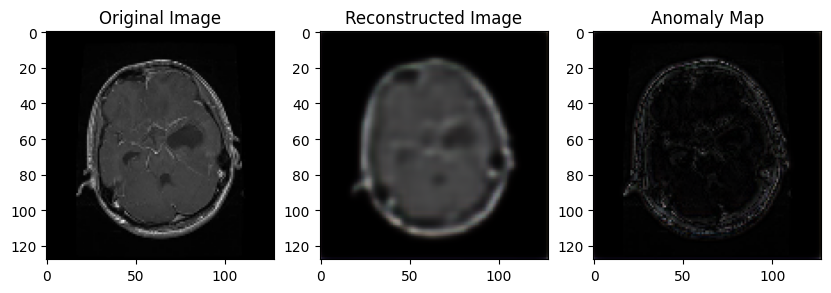

No anomaly detected.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Folder: glioma, Image Path: /content/drive/MyDrive/DEEP LEARNING/glioma/Te-gl_0018.jpg
Reconstruction Loss: [0.00244814]


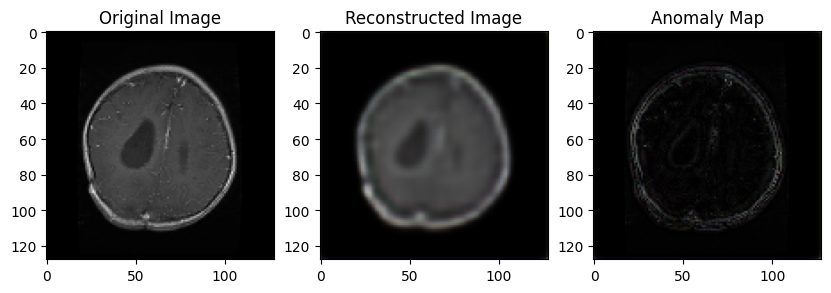

No anomaly detected.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Folder: glioma, Image Path: /content/drive/MyDrive/DEEP LEARNING/glioma/Te-glTr_0000.jpg
Reconstruction Loss: [0.00332585]


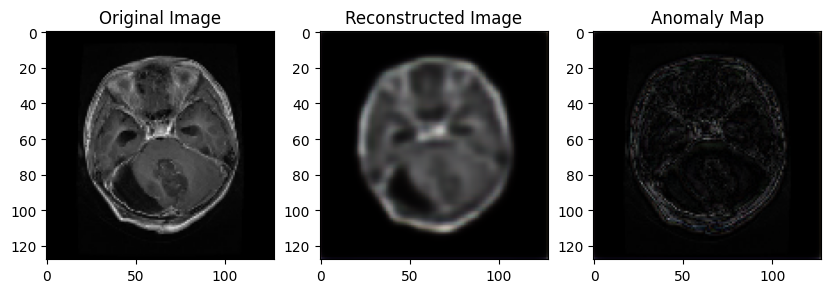

No anomaly detected.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Folder: glioma, Image Path: /content/drive/MyDrive/DEEP LEARNING/glioma/Te-glTr_0001.jpg
Reconstruction Loss: [0.00210918]


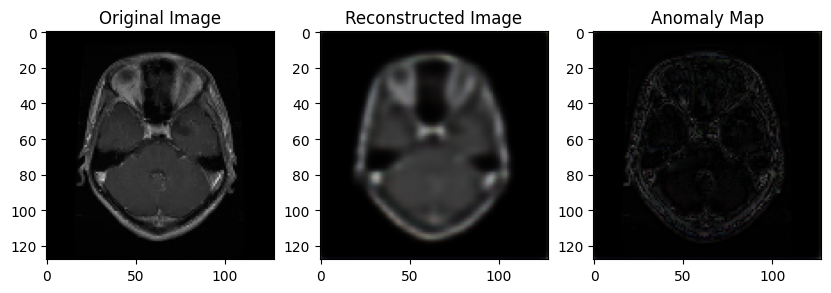

No anomaly detected.

Testing Meningioma Images:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Folder: meningioma, Image Path: /content/drive/MyDrive/DEEP LEARNING/meningioma/Te-meTr_0009.jpg
Reconstruction Loss: [0.00633592]


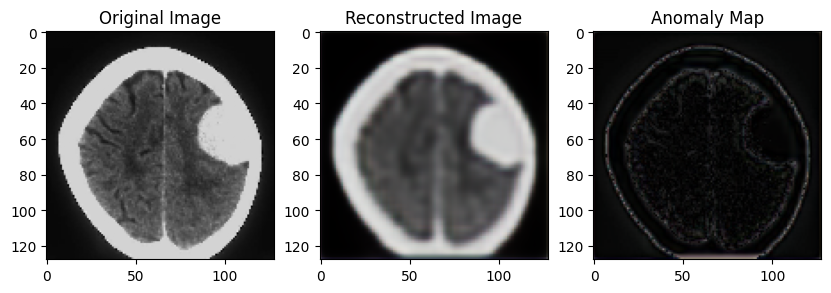

No anomaly detected.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Folder: meningioma, Image Path: /content/drive/MyDrive/DEEP LEARNING/meningioma/Te-meTr_0005.jpg
Reconstruction Loss: [0.01177774]


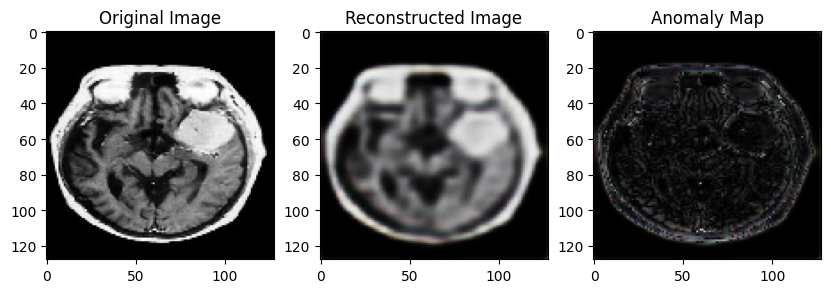

Anomaly detected!

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Folder: meningioma, Image Path: /content/drive/MyDrive/DEEP LEARNING/meningioma/Te-meTr_0008.jpg
Reconstruction Loss: [0.00805127]


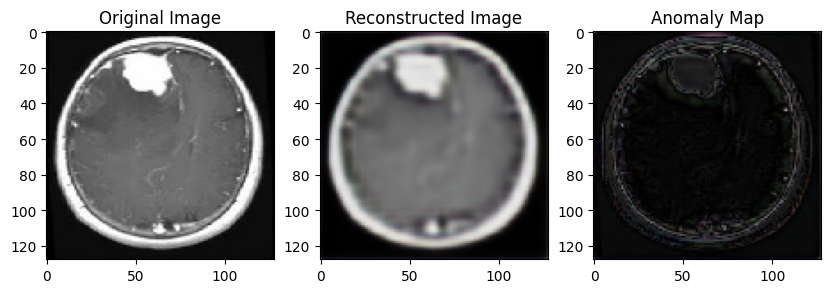

No anomaly detected.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Folder: meningioma, Image Path: /content/drive/MyDrive/DEEP LEARNING/meningioma/Te-me_0017.jpg
Reconstruction Loss: [0.01100107]


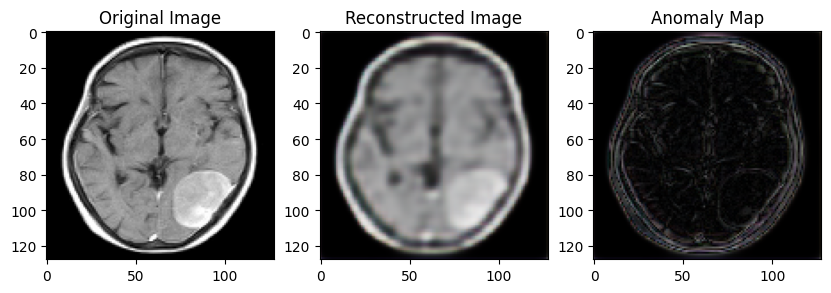

Anomaly detected!

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Folder: meningioma, Image Path: /content/drive/MyDrive/DEEP LEARNING/meningioma/Te-meTr_0002.jpg
Reconstruction Loss: [0.00783763]


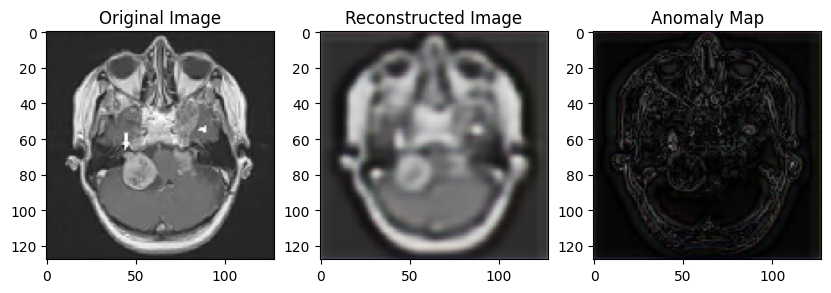

No anomaly detected.

Testing Pituitary Images:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Folder: pituitary, Image Path: /content/drive/MyDrive/DEEP LEARNING/pituitary/Te-piTr_0008.jpg
Reconstruction Loss: [0.00579772]


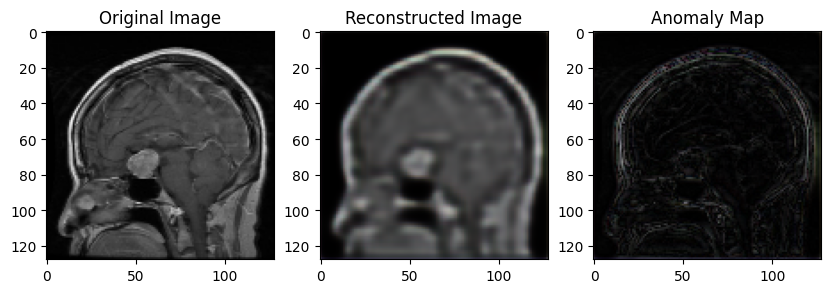

No anomaly detected.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Folder: pituitary, Image Path: /content/drive/MyDrive/DEEP LEARNING/pituitary/Te-piTr_0003.jpg
Reconstruction Loss: [0.00512807]


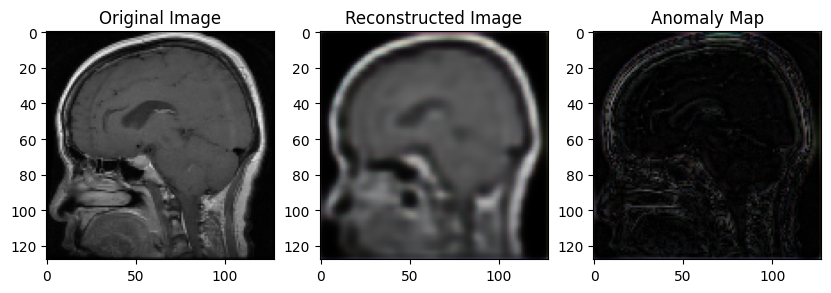

No anomaly detected.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Folder: pituitary, Image Path: /content/drive/MyDrive/DEEP LEARNING/pituitary/Te-piTr_0005.jpg
Reconstruction Loss: [0.00548408]


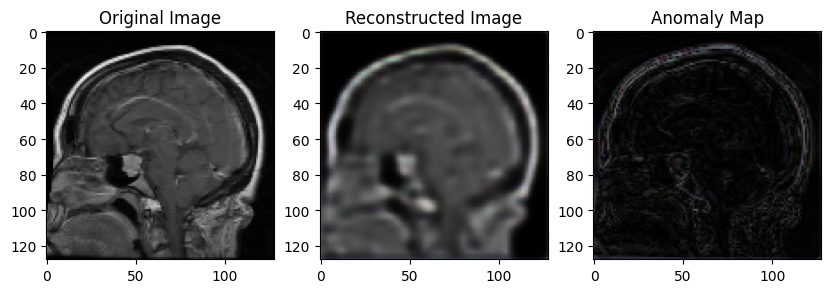

No anomaly detected.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Folder: pituitary, Image Path: /content/drive/MyDrive/DEEP LEARNING/pituitary/Te-piTr_0000.jpg
Reconstruction Loss: [0.00457024]


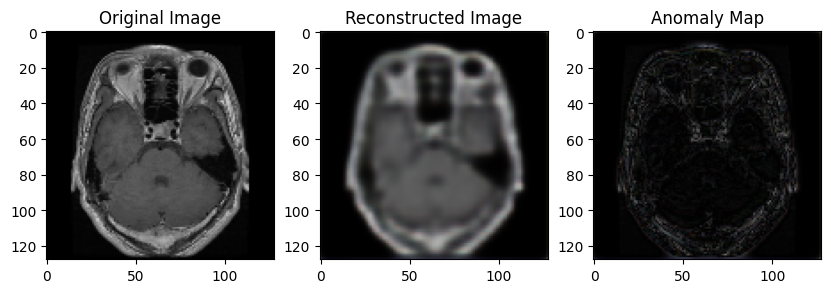

No anomaly detected.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Folder: pituitary, Image Path: /content/drive/MyDrive/DEEP LEARNING/pituitary/Te-piTr_0006.jpg
Reconstruction Loss: [0.00384816]


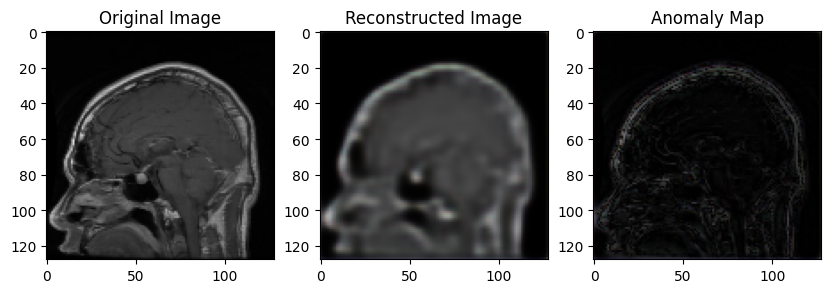

No anomaly detected.



In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

# 정상 및 각 종양 이미지 폴더 경로 설정
normal_folder_path = '/content/drive/MyDrive/DEEP LEARNING/notumor'
glioma_folder_path = '/content/drive/MyDrive/DEEP LEARNING/glioma'
meningioma_folder_path = '/content/drive/MyDrive/DEEP LEARNING/meningioma'
pituitary_folder_path = '/content/drive/MyDrive/DEEP LEARNING/pituitary'

# 이미지 로드 함수
def load_image(img_path, target_size=(128, 128)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img) / 255.0  # 픽셀 값을 0~1로 정규화
    img_array = np.expand_dims(img_array, axis=0)  # 배치 차원 추가
    return img_array

# 비정상 이미지 탐지 함수 (폴더 이름 표시 포함)
def detect_anomaly(img_path, model, folder_name):
    test_img = load_image(img_path)
    reconstructed_img = model.predict(test_img)  # Autoencoder를 통해 이미지 복원

    # 재구성 오차 계산
    anomaly_map = np.abs(test_img[0] - reconstructed_img[0])
    loss = np.mean(np.square(test_img - reconstructed_img), axis=(1, 2, 3))

    # 폴더 정보 출력
    print(f"Folder: {folder_name}, Image Path: {img_path}")
    print("Reconstruction Loss:", loss)

    # 시각화
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(test_img[0])

    plt.subplot(1, 3, 2)
    plt.title("Reconstructed Image")
    plt.imshow(reconstructed_img[0])

    plt.subplot(1, 3, 3)
    plt.title("Anomaly Map")
    plt.imshow(anomaly_map, cmap='hot')
    plt.show()

    # 비정상 여부 판단
    if loss > 0.01:
        print("Anomaly detected!\n")
    else:
        print("No anomaly detected.\n")

# 각 폴더에서 이미지 테스트 (폴더명 포함)
print("Testing Normal Images:")
for img_name in os.listdir(normal_folder_path)[:5]:
    img_path = os.path.join(normal_folder_path, img_name)
    detect_anomaly(img_path, autoencoder, "notumor")

print("Testing Glioma Images:")
for img_name in os.listdir(glioma_folder_path)[:5]:
    img_path = os.path.join(glioma_folder_path, img_name)
    detect_anomaly(img_path, autoencoder, "glioma")

print("Testing Meningioma Images:")
for img_name in os.listdir(meningioma_folder_path)[:5]:
    img_path = os.path.join(meningioma_folder_path, img_name)
    detect_anomaly(img_path, autoencoder, "meningioma")

print("Testing Pituitary Images:")
for img_name in os.listdir(pituitary_folder_path)[:5]:
    img_path = os.path.join(pituitary_folder_path, img_name)
    detect_anomaly(img_path, autoencoder, "pituitary")


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import os

# 결과 저장용 리스트
true_labels = []  # 실제 라벨 (0: 정상, 1: 비정상)
predicted_labels = []  # 예측 라벨 (0: 정상, 1: 비정상)
loss_values = {"normal": [], "anomaly": []}  # 클래스별 손실 값 저장

# 임계값 설정 (재구성 손실 기준)
threshold = 0.01

# 비정상 감지 및 예측 저장 함수
def detect_anomaly_and_evaluate(img_path, model, folder_name, label):
    global true_labels, predicted_labels, loss_values
    test_img = load_image(img_path)
    reconstructed_img = model.predict(test_img)

    # 재구성 오차 계산
    loss = np.mean(np.square(test_img - reconstructed_img), axis=(1, 2, 3))[0]
    predicted_label = 1 if loss > threshold else 0  # 비정상: 1, 정상: 0

    true_labels.append(label)
    predicted_labels.append(predicted_label)

    # 클래스별 손실 저장
    if label == 0:  # 정상
        loss_values["normal"].append(loss)
    else:  # 비정상
        loss_values["anomaly"].append(loss)

# 테스트 수행 (폴더별)
print("Testing and Collecting Results...")
for img_name in os.listdir(normal_folder_path)[:50]:
    img_path = os.path.join(normal_folder_path, img_name)
    detect_anomaly_and_evaluate(img_path, autoencoder, "notumor", label=0)

for img_name in os.listdir(glioma_folder_path)[:50]:
    img_path = os.path.join(glioma_folder_path, img_name)
    detect_anomaly_and_evaluate(img_path, autoencoder, "glioma", label=1)

for img_name in os.listdir(meningioma_folder_path)[:50]:
    img_path = os.path.join(meningioma_folder_path, img_name)
    detect_anomaly_and_evaluate(img_path, autoencoder, "meningioma", label=1)

for img_name in os.listdir(pituitary_folder_path)[:50]:
    img_path = os.path.join(pituitary_folder_path, img_name)
    detect_anomaly_and_evaluate(img_path, autoencoder, "pituitary", label=1)

# 성능 지표 계산
accuracy = accuracy_score(true_labels, predicted_labels)
report = classification_report(true_labels, predicted_labels, target_names=["Normal", "Anomaly"])

# 클래스별 평균 손실 계산
average_loss_normal = np.mean(loss_values["normal"])
average_loss_anomaly = np.mean(loss_values["anomaly"])

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Average Loss (Normal):", average_loss_normal)
print("Average Loss (Anomaly):", average_loss_anomaly)



Testing and Collecting Results...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━

# 새 섹션

In [ ]:
!pip install tensorflow-addons


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 14.0 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.4.1
    Uninstalling typeguard-4.4.1:
      Successfully uninstalled typeguard-4.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.4.0 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


In [ ]:
# TensorFlow 버전 변경
!pip install tensorflow==2.15.0
!pip install tensorflow-addons


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 77.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 57.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 108.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.0 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorboard
    Found existing installatio

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0

# EfficientNet 모델 정의
def create_efficientnet_model(input_shape, n_classes):
    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)
    x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
    output = Dense(n_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=output)
    return model

# 모델 빌드 및 컴파일
input_shape = (128, 128, 3)
n_classes = 2

model = create_efficientnet_model(input_shape, n_classes)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 데이터 준비
datagen = ImageDataGenerator(rescale=1.0 / 255.0, validation_split=0.2)
img_size = (128, 128)
batch_size = 32

train_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/DEEP LEARNING/Training',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='sparse',
    subset='training',
    classes=['glioma', 'notumor']
)

validation_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/DEEP LEARNING/',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='sparse',
    subset='validation',
    classes=['glioma', 'notumor']
)

# 모델 학습
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=10  # 원하는 epoch 수로 설정
)


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Found 2333 images belonging to 2 classes.
Found 141 images belonging to 2 classes.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


72/72 ━━━━━━━━━━━━━━━━━━━━ 831s 10s/step - accuracy: 0.9422 - loss: 0.1363 - val_accuracy: 0.4531 - val_loss: 1.1381
Epoch 2/10
 1/72 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 1.0000 - loss: 0.0041

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


72/72 ━━━━━━━━━━━━━━━━━━━━ 14s 202ms/step - accuracy: 1.0000 - loss: 0.0041 - val_accuracy: 0.1538 - val_loss: 1.6388
Epoch 3/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 8s 97ms/step - accuracy: 0.9955 - loss: 0.0109 - val_accuracy: 0.4297 - val_loss: 1.0663
Epoch 4/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 0.3846 - val_loss: 1.0790
Epoch 5/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 8s 97ms/step - accuracy: 0.9979 - loss: 0.0043 - val_accuracy: 0.5703 - val_loss: 1.5293
Epoch 6/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - accuracy: 1.0000 - loss: 0.0026 - val_accuracy: 0.4615 - val_loss: 1.6875
Epoch 7/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - accuracy: 0.9968 - loss: 0.0164 - val_accuracy: 0.5547 - val_loss: 0.6013
Epoch 8/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - accuracy: 1.0000 - loss: 2.6224e-04 - val_accuracy: 0.6154 - val_loss: 0.5599
Epoch 9/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 8s 94ms/step - accuracy: 0.9988 - loss: 0.0031 - val_accuracy: 0.7031 - val

In [ ]:
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# 폴더 내 모든 이미지 예측 함수
def predict_images_in_folder(model, folder_path, img_size=(128, 128)):
    for img_file in os.listdir(folder_path):
        # 파일 경로 생성
        img_path = os.path.join(folder_path, img_file)

        # 이미지 파일인지 확인
        if img_file.lower().endswith(('.png', '.jpg', '.jpeg')):
            # 이미지 로드 및 전처리
            img = load_img(img_path, target_size=img_size)
            img_array = img_to_array(img) / 255.0  # 스케일링
            img_array = np.expand_dims(img_array, axis=0)  # 모델 입력 형식에 맞게 차원 확장

            # 예측 수행
            prediction = model.predict(img_array)
            class_idx = np.argmax(prediction, axis=1)[0]  # 확률이 가장 높은 클래스 인덱스
            confidence = prediction[0][class_idx]  # 해당 클래스의 예측 확률

            # 결과 출력
            if class_idx == 0:
                print(f"{img_file}: 예측 - 종양 없음 (확신도: {confidence:.2f})")
            else:
                print(f"{img_file}: 예측 - 종양 있음 (확신도: {confidence:.2f})")

# 예측할 이미지가 있는 폴더 경로
test_folder_path = '/content/drive/MyDrive/DEEP LEARNING/glioma'
predict_images_in_folder(model, test_folder_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
Te-glTr_0004.jpg: 예측 - 종양 있음 (확신도: 0.58)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Te-glTr_0008.jpg: 예측 - 종양 있음 (확신도: 0.53)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Te-gl_0018.jpg: 예측 - 종양 없음 (확신도: 0.53)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Te-glTr_0000.jpg: 예측 - 종양 있음 (확신도: 0.67)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Te-glTr_0001.jpg: 예측 - 종양 있음 (확신도: 0.63)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Te-gl_0016.jpg: 예측 - 종양 없음 (확신도: 0.53)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Te-gl_0020.jpg: 예측 - 종양 있음 (확신도: 0.52)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Te-gl_0011.jpg: 예측 - 종양 있음 (확신도: 0.64)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Te-gl_0019.jpg: 예측 - 종양 없음 (확신도: 0.75)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Te-gl_0021.jpg: 예측 - 종양 없음 (확신도: 0.87)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Te-glTr_0002.jpg: 예측 - 종양 있음 (확신도: 0.56)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Te-glTr_0009.jpg: 예측 - 종양 있음 (확신도: 0.61)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Te-glTr_0003.jpg: 예측 - 종양 있음